In [21]:
from scipy import stats

In [22]:
help(stats.linregress) #stats of linear regression

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [23]:
import pandas as pd

In [24]:
import pandas_datareader as web

In [25]:
spy_etf = web.DataReader('SPY','yahoo')# This will give us an index, basically the market
#spy is the etf indicator of this market, indices SP500
# Yahoo is the source, google didnt work

In [26]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-02-06 to 2022-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [27]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-06,229.330002,228.539993,228.869995,228.929993,57790100.0,209.524765
2017-02-07,229.660004,228.720001,229.380005,228.940002,57931200.0,209.533905
2017-02-08,229.389999,228.309998,228.940002,229.240005,51566200.0,209.808487
2017-02-09,230.949997,229.240005,229.240005,230.600006,65955200.0,211.053177
2017-02-10,231.770004,230.619995,231.000000,231.509995,66015900.0,211.886032


In [28]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-28,442.000000,427.820007,432.679993,441.950012,164457400.0,441.950012
2022-01-31,450.279999,439.809998,441.239990,449.910004,152251400.0,449.910004
2022-02-01,453.630005,446.940002,450.679993,452.950012,123155400.0,452.950012
2022-02-02,458.119995,453.049988,455.500000,457.350006,117064100.0,457.350006
2022-02-03,452.970001,449.149994,450.950012,450.529999,48705879.0,450.529999


In [29]:
start = pd.to_datetime('2017-02-06')
end = pd.to_datetime('2022-02-03')

In [30]:
goog = web.DataReader('GOOG','yahoo',start,end)#Grab google stocks using yahoo api then start n end dates
aapl = web.DataReader('AAPL','yahoo',start,end)
tsla = web.DataReader('TSLA','yahoo',start,end)

In [31]:
#CAPM says that there should be some relationship btw google stock performance(goog) and the overall market performance(spy_etf)
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-06,801.669983,795.250000,799.700012,801.340027,1184500,801.340027
2017-02-07,810.500000,801.780029,803.989990,806.969971,1241200,806.969971
2017-02-08,811.840027,803.190002,807.000000,808.380005,1155300,808.380005
2017-02-09,810.659973,804.539978,809.510010,809.559998,989700,809.559998
2017-02-10,815.250000,809.780029,811.700012,813.669983,1135000,813.669983


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

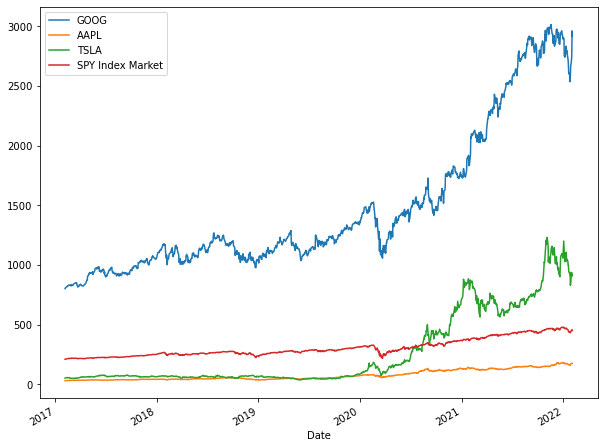

In [33]:
goog['Adj Close'].plot(label='GOOG',figsize=(10,8))
aapl['Adj Close'].plot(label='AAPL')
tsla['Adj Close'].plot(label='TSLA')
spy_etf['Adj Close'].plot(label='SPY Index Market')# One figsize is okay
plt.legend()

In [34]:
#CAPM wants to know the alpha n beta values, so it compares them(probably 2 sha spy n one other)
aapl['Cumulative'] = aapl['Adj Close']/aapl['Adj Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Adj Close']/spy_etf['Adj Close'].iloc[0]
goog['Cumulative'] = goog['Adj Close']/goog['Adj Close'].iloc[0]
tsla['Cumulative'] = tsla['Adj Close']/tsla['Adj Close'].iloc[0]

#This says apple close divided by appl close on first day

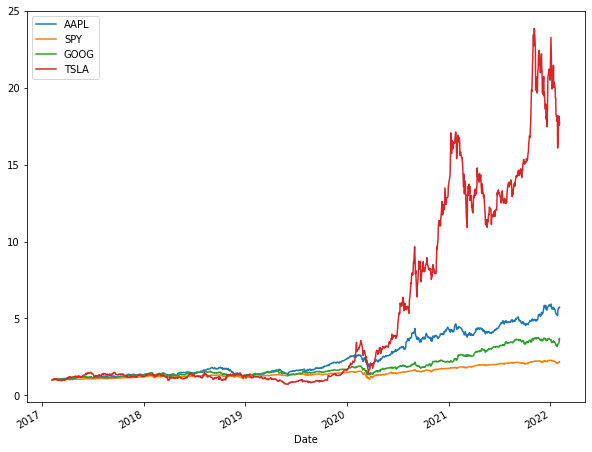

In [35]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
goog['Cumulative'].plot(label='GOOG')
tsla['Cumulative'].plot(label='TSLA')

plt.legend()
#This shows how much you'd get if you invested $1 on the first day for all of them each n their current value now

In [36]:
aapl['Daily Returns'] = aapl['Adj Close'].pct_change(1)
spy_etf['Daily Returns'] = spy_etf['Adj Close'].pct_change(1)
goog['Daily Returns'] = goog['Adj Close'].pct_change(1)
tsla['Daily Returns'] = tsla['Adj Close'].pct_change(1)

#This is calculating the daily returns

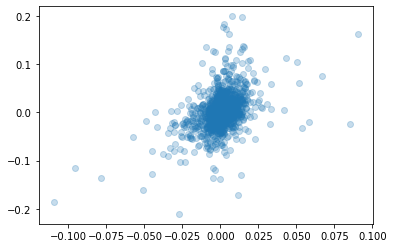

In [41]:
#plt.scatter(aapl['Daily Returns'],spy_etf['Daily Returns'],goog['Daily Returns'],tsla['Daily Returns'],alpha=0.95)
plt.scatter(spy_etf['Daily Returns'],tsla['Daily Returns'],alpha=0.25)

#This is to get the correlation of this, perfect correlation would give a some sort of linear
#Alpha is 0.25 cuz there would be a ton of points, correlation points

In [42]:
#the beta value is actually some sort of correlation, using linear regression since its the perfect correlation
beta,alpha,r_value,p_value,std_err = stats.linregress(tsla['Daily Returns'].iloc[1:],spy_etf['Daily Returns'].iloc[1:])
#From the CAPM formula, its just alpha n beta values that we are interested in

In [43]:
#If the correlation is very close then the scatter plot would be a straight diagonal line shape and the beta value would be high,close to 1.0(perfect)
beta

0.132386098305339

In [44]:
alpha #Alpha would be extremely small

0.0002797399250216751

In [45]:
r_value # Value of 0.4, not a very good fit

0.42698411687815535